In [15]:
# Dependencies
import random
import json
from pprint import pprint
import requests
from citipy import citipy
from config import api_key
import pandas as pd
import matplotlib.pyplot as plt

# Generate Cities List

In [16]:
# Create coordinates list to populate with random coordinates
coordinates = []
coordinate_count = input("How many coordinates do you want to use to try to successfully query at least 500 unique cities? ")

# Generate random coordinates and append to coordinates list
for x in range(int(coordinate_count)):
    coordinates.append((random.randint(-90, 91), random.randint(-180, 181)))

# print(coordinates)

How many coordinates do you want to use? 100


In [17]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city_obj = citipy.nearest_city(lat, lon)
    city = city_obj.city_name
    
    # Want unique cities
    if city not in cities:
        cities.append(city)

# print(cities)
print(f"Unique cities found based on lat/lon out of {coordinate_count} coordinate pairs: {len(cities)}")

Unique cities found based on lat/lon out of 100 coordinate pairs: 76


# Perform API Calls

In [18]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [19]:
# Set up lists to hold reponse information
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    print(f"Processing Record {i + 1} | {city}")
    
    # Replace spaces in cities names of more than one word
    city_name = city.replace(" ", "+")
    
    # Print each query
    full_query_url = query_url + city_name
    print(full_query_url)
    
    # Retrieve data as json
    response = requests.get(full_query_url).json()
    
    # Append data to lists
    try:
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print(f"*City Not Found ({city})")
    except:
        raise
        
# print(name)
print(f"Number of cities successfully queried out of {len(cities)}: {len(name)}")

Processing Record 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kapaa
Processing Record 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=qaanaaq
Processing Record 3 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lavrentiya
Processing Record 4 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=faanui
Processing Record 5 | longview
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=longview
Processing Record 6 | houma
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=houma
Processing Record 7 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=souillac
Processing Re

Processing Record 57 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=longyearbyen
Processing Record 58 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=fairbanks
Processing Record 59 | toliary
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=toliary
*City Not Found (toliary)
Processing Record 60 | barbar
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=barbar
*City Not Found (barbar)
Processing Record 61 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=mandalgovi
Processing Record 62 | matam
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=matam
Processing Record 63 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid

In [20]:
cities_data_df = pd.DataFrame({'City': name, 
                               'Cloudiness': cloudiness, 
                               'Country': country, 
                               'Date': date, 
                               'Humidity': humidity, 
                               'Lat': lat, 
                               'Lon': lon, 
                               'Max Temp': max_temp, 
                               'Wind Speed': wind_speed})

cities_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Kapaa,40,US,1520283360,69,22.08,-159.32,77.00,16.11
1,Qaanaaq,68,GL,1520285956,86,77.48,-69.36,2.42,8.19
2,Lavrentiya,56,RU,1520286174,100,65.58,-170.99,22.09,7.85
3,Faanui,88,PF,1520286175,100,-16.48,-151.75,80.77,12.88
4,Longview,1,US,1520285700,35,32.50,-94.74,73.40,8.05
5,Houma,92,CN,1520286176,76,35.63,111.36,33.79,2.71
6,Souillac,0,FR,1520283600,87,45.60,-0.60,48.20,4.70
7,Guerrero Negro,0,MX,1520286177,44,27.97,-114.04,73.39,3.49
8,Butaritari,44,KI,1520285987,100,3.07,172.79,82.61,14.56
9,Volokolamsk,12,RU,1520286178,87,56.03,35.95,8.27,6.85


# Latitude vs. Temperature Plot

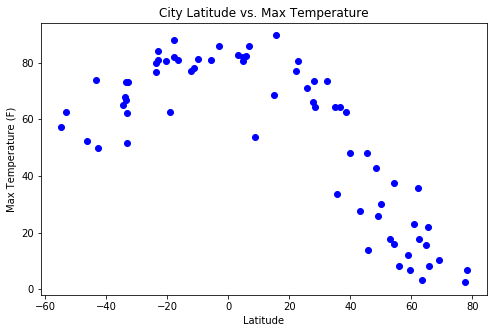

In [21]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Max Temp'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Latitude vs. Temperature Plot
plt.savefig('images/LatVsTemp.png')
plt.show()

# Latitude vs. Humidity Plot

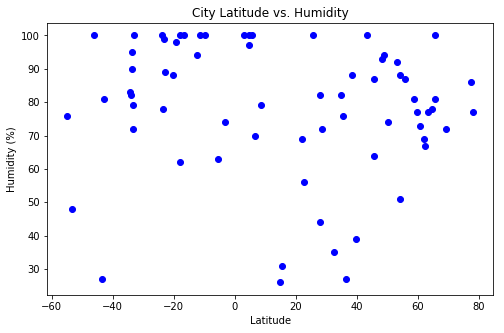

In [22]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Humidity'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Latitude vs. Humidity Plot
plt.savefig('images/LatVsHumidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

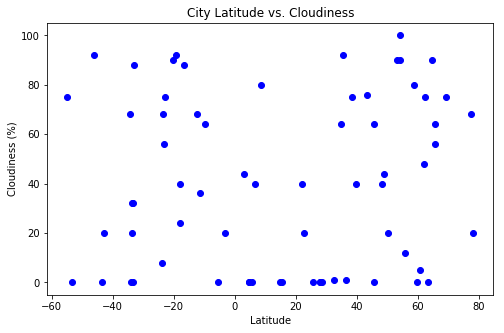

In [23]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Cloudiness'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Latitude vs. Cloudiness Plot
plt.savefig('images/LatVsCloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

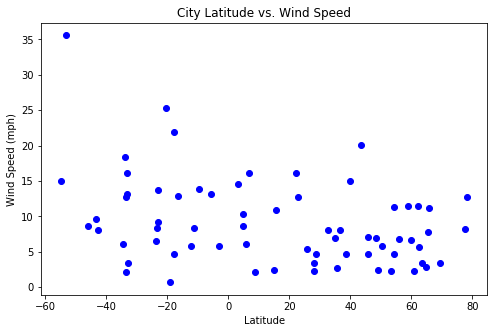

In [24]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Wind Speed'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Latitude vs. Wind Speed Plot
plt.savefig('images/LatVsWindSpd.png')
plt.show()